In [2]:
from classifier.knn import KNN

Classifier package loaded!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
# Load fitur harralicknya

kombinasiFeature = [[1, 2, 3], [0, 45, 90, 135]]

list_harralick_dfs = []

for d in kombinasiFeature[0]:
    for theta in kombinasiFeature[1]:
        df = pd.read_csv(f"dataset/ExtractResult/harralick/features_d{d}_theta{theta}.csv")
        df = df.set_index('image')
        list_harralick_dfs.append(df)
        

### Lanjut Harralick

In [27]:
y = list_harralick_dfs[0]['label']
X_train, X_test, y_train, y_test = train_test_split(list_harralick_dfs[0].drop('label', axis=1), y, test_size=0.2, random_state=42)

In [28]:
list_harralick_dfs[0].head()

,energy,contrast,correlation,variance,homogeneity,sum_average,sum_variance,sum_entropy,entropy,difference_variance,difference_entropy,information_measure_of_correlation1,information_measure_of_correlation2,max_correlation_coefficient,label
image,,,,,,,,,,,,,,,
img-0,0.000436,110.166831,0.968410,1745.470091,0.278715,229.194882,19985.685932,11.764628,11.764628,11716.451490,11.764628,9.290623,9.290623,0.002092,0
img-1,0.003707,185.044845,0.955084,2067.488357,0.310510,172.035618,15465.268545,11.286891,11.286891,6304.576291,11.286891,8.856255,8.856255,0.056225,0
img-2,0.031999,122.675935,0.963039,1656.280969,0.416517,116.701403,9909.617267,9.898711,9.898711,2887.199510,9.898711,8.058422,8.058422,0.177165,0
img-3,0.000704,90.915170,0.974211,1780.597682,0.354354,243.089998,21789.987993,11.305699,11.305699,13606.942167,11.305699,8.842398,8.842398,0.009166,0
img-4,0.009164,412.338029,0.951060,4224.241207,0.360961,255.528113,32794.369367,11.062443,11.062443,14803.458480,11.062443,8.406406,8.406406,0.093442,0


In [37]:
# Simpan hasil evaluasi dalam dictionary
knn_results = {}

# Loop untuk setiap dataframe dalam list_harralick_dfs
for index, df in enumerate(list_harralick_dfs):
    y = df['label']
    X = df.drop(columns=['label'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn_results[index] = {'k_values': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

    for k in range(3, 16):  # Mencoba k dari 3 sampai 15
        model = KNN(k=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        knn_results[index]['k_values'].append(k)
        knn_results[index]['accuracy'].append(acc)
        knn_results[index]['precision'].append(prec)
        knn_results[index]['recall'].append(rec)
        knn_results[index]['f1_score'].append(f1)

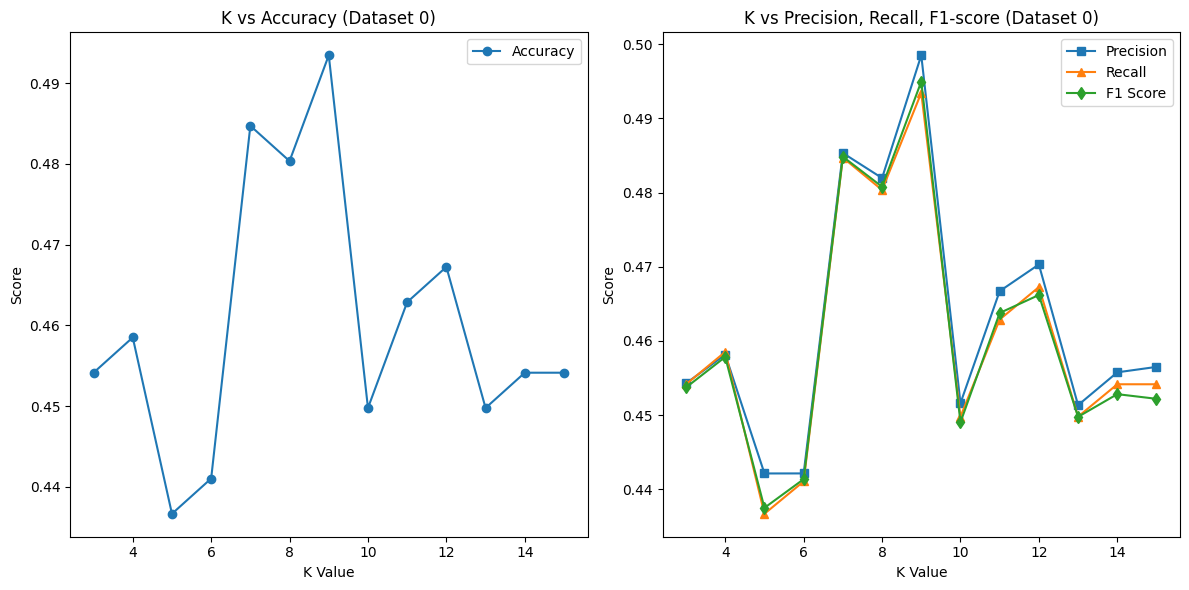

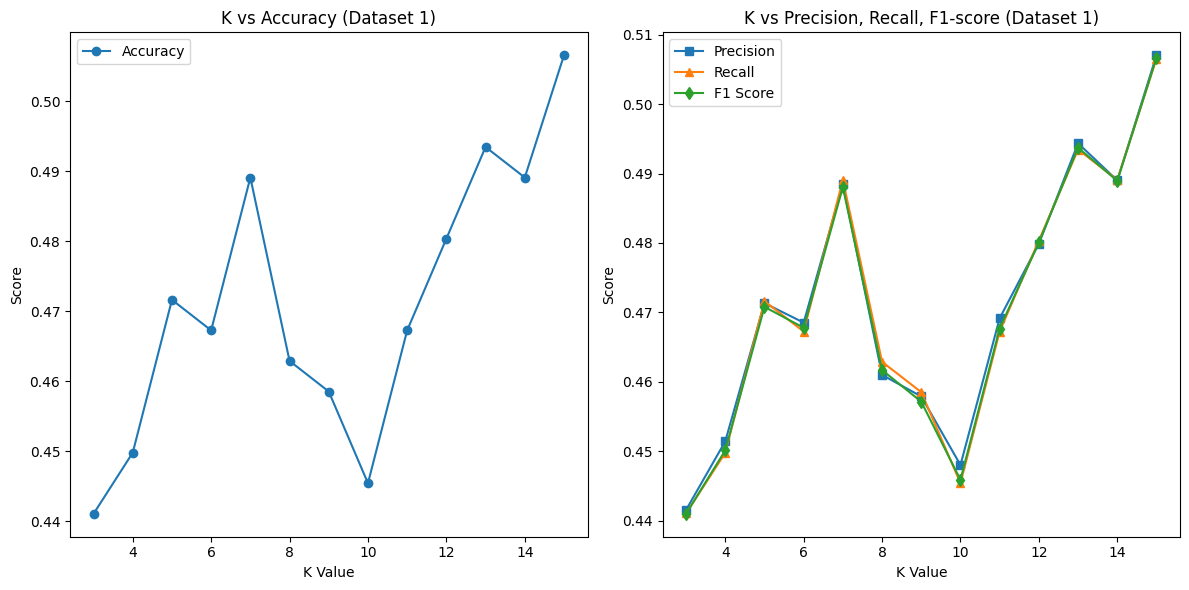

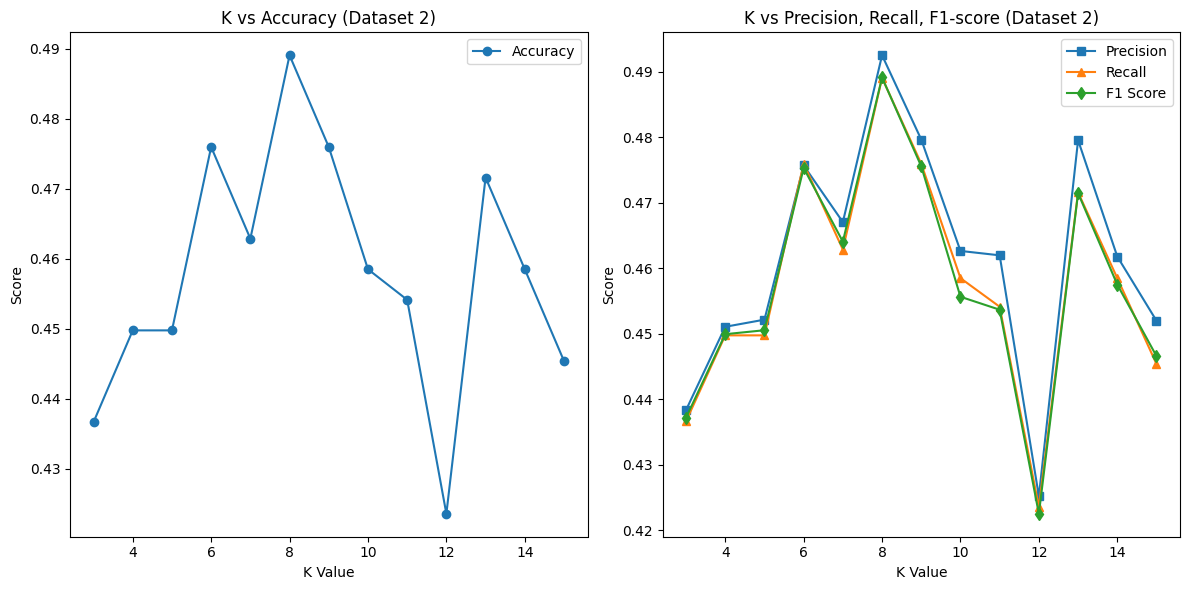

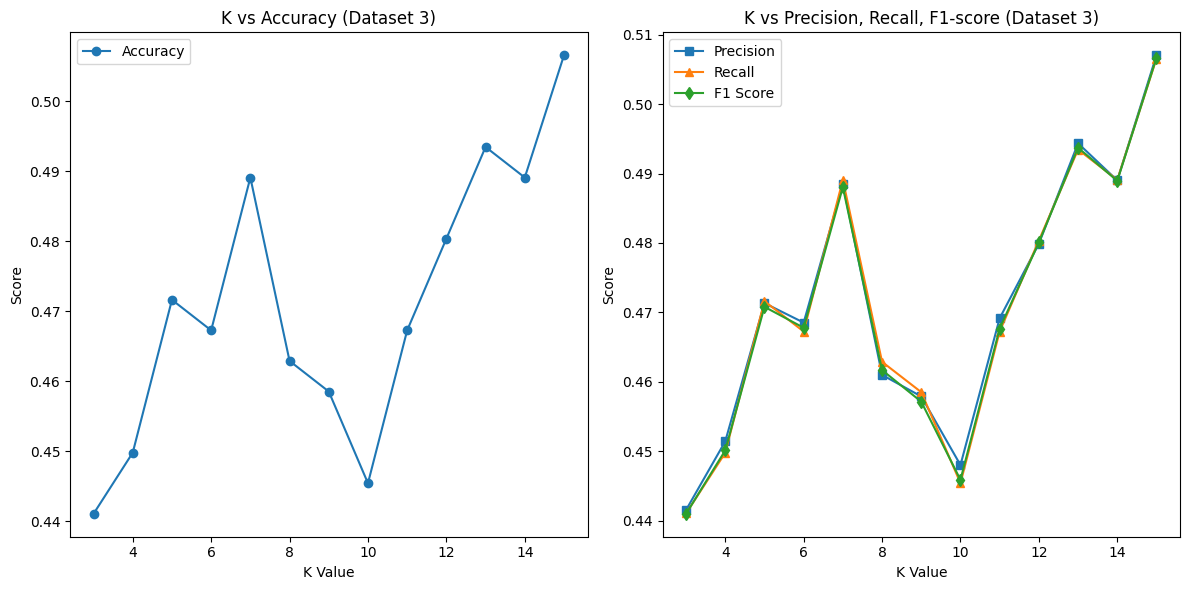

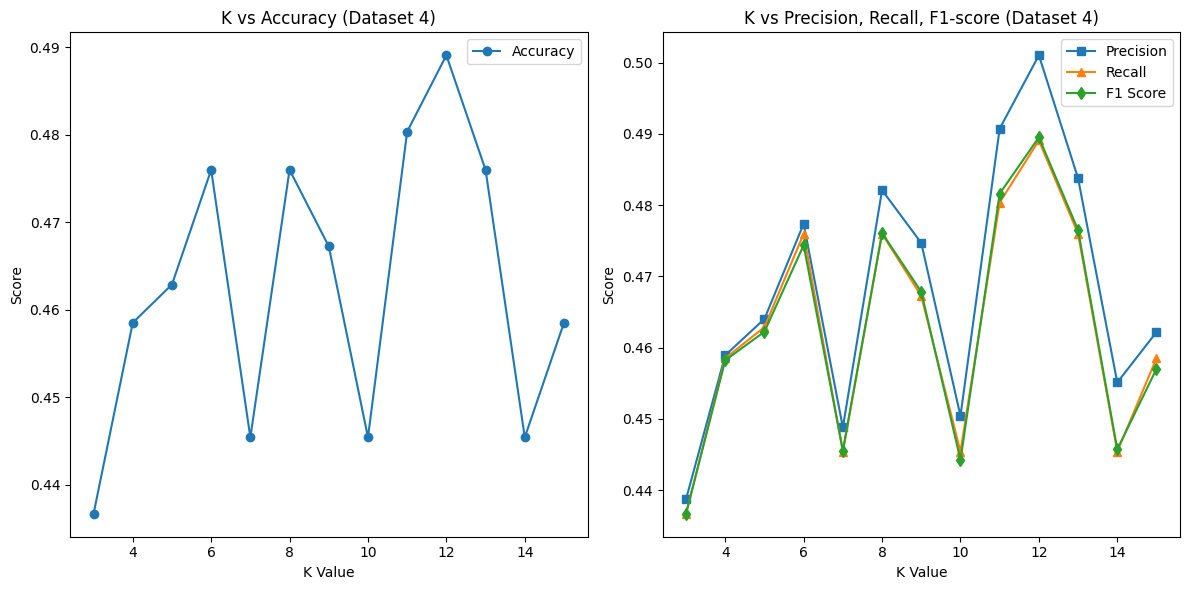

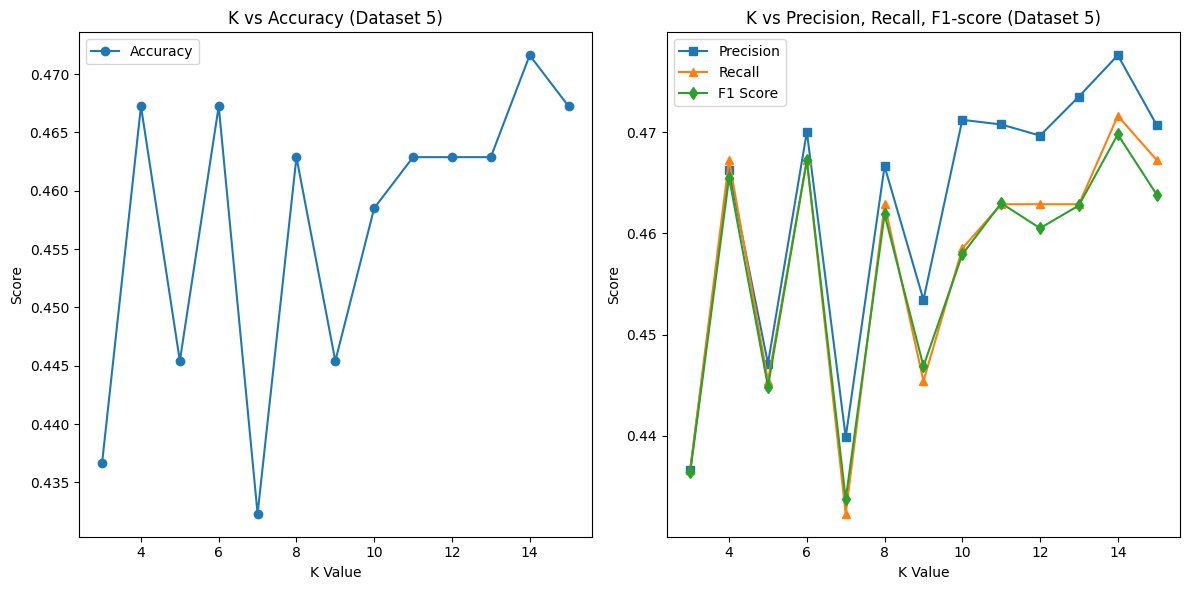

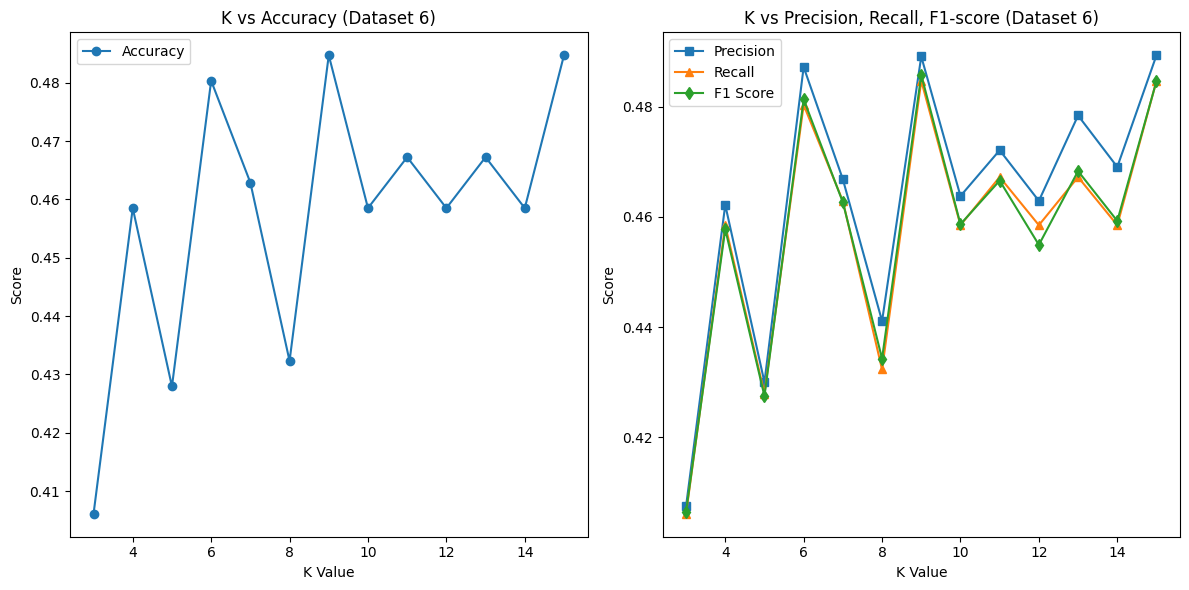

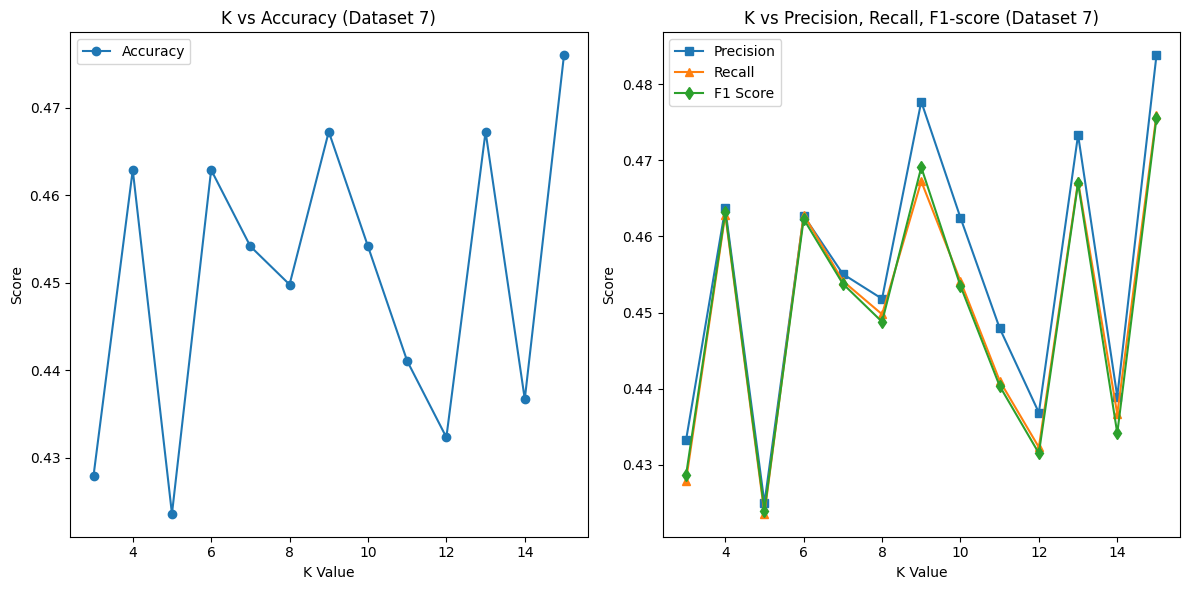

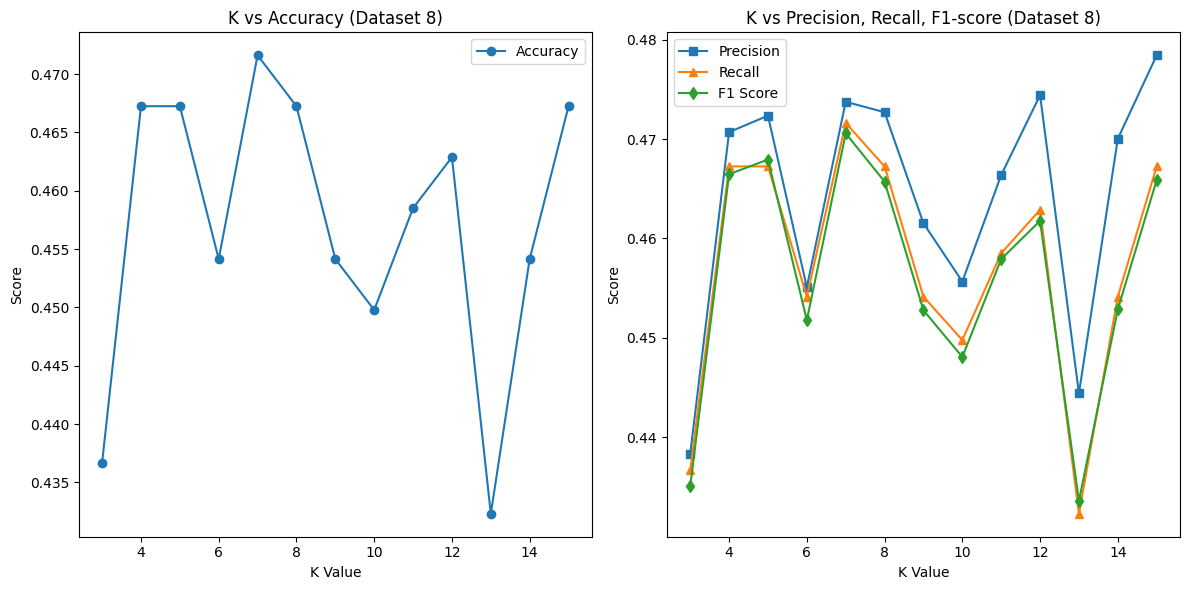

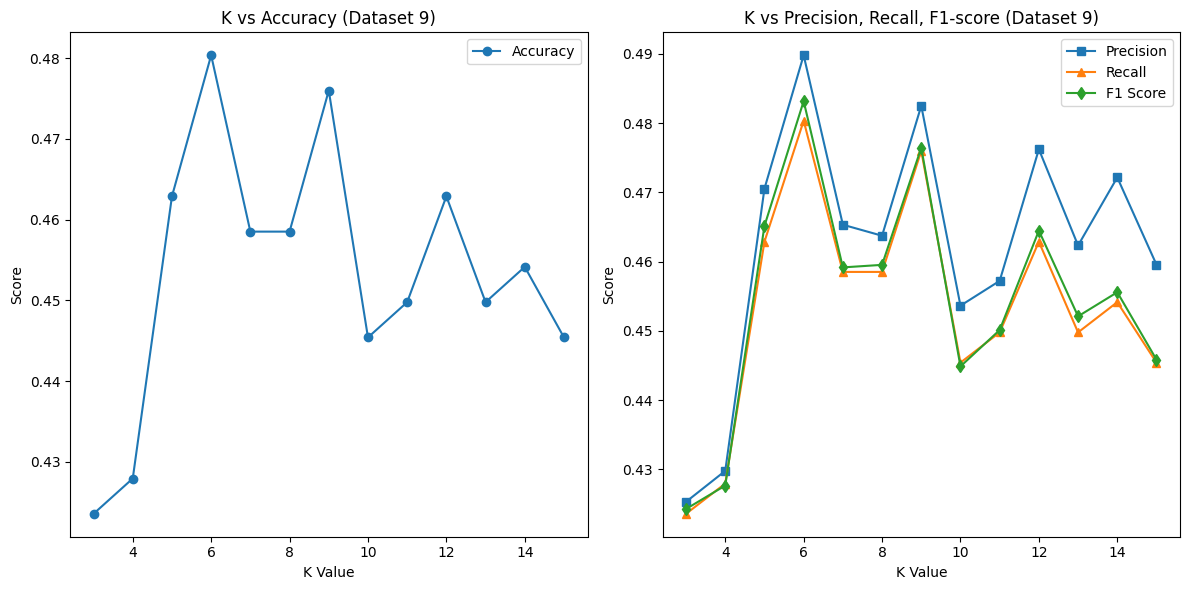

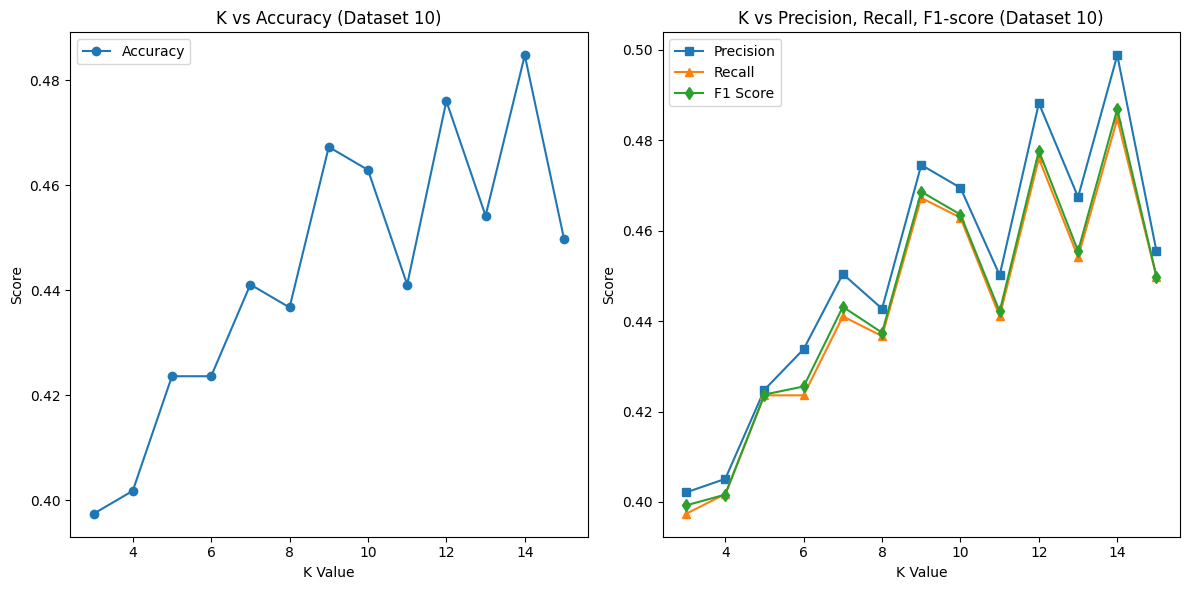

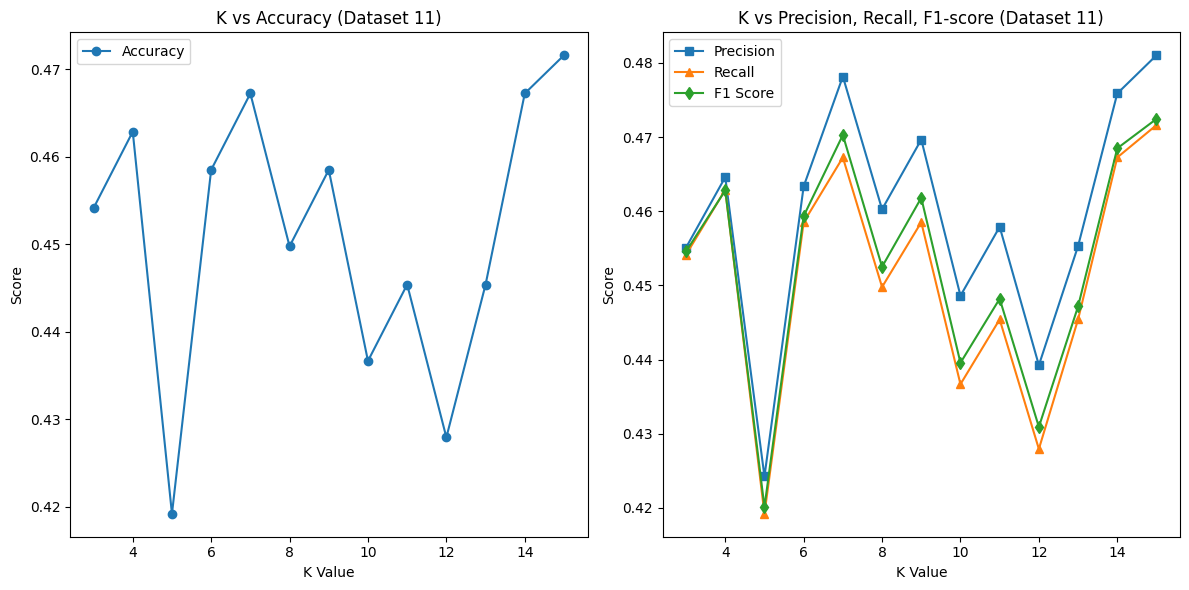

In [38]:
# Visualisasi hasil evaluasi
for index, results in knn_results.items():
    plt.figure(figsize=(12, 6))
    
    # Plot Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(results['k_values'], results['accuracy'], marker='o', linestyle='-', label='Accuracy')
    plt.xlabel('K Value')
    plt.ylabel('Score')
    plt.title(f'K vs Accuracy (Dataset {index})')
    plt.legend()
    
    # Plot Precision, Recall, dan F1-score
    plt.subplot(1, 2, 2)
    plt.plot(results['k_values'], results['precision'], marker='s', linestyle='-', label='Precision')
    plt.plot(results['k_values'], results['recall'], marker='^', linestyle='-', label='Recall')
    plt.plot(results['k_values'], results['f1_score'], marker='d', linestyle='-', label='F1 Score')
    plt.xlabel('K Value')
    plt.ylabel('Score')
    plt.title(f'K vs Precision, Recall, F1-score (Dataset {index})')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [42]:
knn_results

{0: {'k_values': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
  'accuracy': [0.45414847161572053,
   0.4585152838427948,
   0.4366812227074236,
   0.4410480349344978,
   0.4847161572052402,
   0.48034934497816595,
   0.49344978165938863,
   0.4497816593886463,
   0.462882096069869,
   0.4672489082969432,
   0.4497816593886463,
   0.45414847161572053,
   0.45414847161572053],
  'precision': [0.45427486754375085,
   0.45814722870265134,
   0.4421204701238831,
   0.44212587509530743,
   0.4853312011808844,
   0.48195800646538656,
   0.4985160006994069,
   0.45159955754968734,
   0.4667058892079205,
   0.4703022461392185,
   0.45133430373605044,
   0.4557574799547571,
   0.4564913183461292],
  'recall': [0.45414847161572053,
   0.4585152838427948,
   0.4366812227074236,
   0.4410480349344978,
   0.4847161572052402,
   0.48034934497816595,
   0.49344978165938863,
   0.4497816593886463,
   0.462882096069869,
   0.4672489082969432,
   0.4497816593886463,
   0.45414847161572053,
   0.4541484

In [63]:
kombinasiFeature = [[1, 2, 3], [0, 45, 90, 135]]
index = 0
max_all_accuracy = []

for i in kombinasiFeature[0]:
    for j in kombinasiFeature[1]:
        print(f"Akurasi terbaik Harralick jarak {i} dan theta {j} = {max(knn_results[index]['accuracy'])}")
        max_all_accuracy.append(max(knn_results[index]['accuracy']))
        index += 1

Akurasi terbaik Harralick jarak 1 dan theta 0 = 0.49344978165938863
Akurasi terbaik Harralick jarak 1 dan theta 45 = 0.5065502183406113
Akurasi terbaik Harralick jarak 1 dan theta 90 = 0.4890829694323144
Akurasi terbaik Harralick jarak 1 dan theta 135 = 0.5065502183406113
Akurasi terbaik Harralick jarak 2 dan theta 0 = 0.4890829694323144
Akurasi terbaik Harralick jarak 2 dan theta 45 = 0.47161572052401746
Akurasi terbaik Harralick jarak 2 dan theta 90 = 0.4847161572052402
Akurasi terbaik Harralick jarak 2 dan theta 135 = 0.4759825327510917
Akurasi terbaik Harralick jarak 3 dan theta 0 = 0.47161572052401746
Akurasi terbaik Harralick jarak 3 dan theta 45 = 0.48034934497816595
Akurasi terbaik Harralick jarak 3 dan theta 90 = 0.4847161572052402
Akurasi terbaik Harralick jarak 3 dan theta 135 = 0.47161572052401746


In [64]:
max(max_all_accuracy)

0.5065502183406113

In [69]:
for index, result in knn_results.items():
    for i in range(len(result['accuracy'])):
        if result['accuracy'][i] == max(max_all_accuracy):
            idx_best_K = result['accuracy'].index(max(max_all_accuracy))
            print(f"Nilai K pada KNN dengan akurasi terbaik yang didapat adalah {result['k_values'][idx_best_K]}")

Nilai K pada KNN dengan akurasi terbaik yang didapat adalah 15
Nilai K pada KNN dengan akurasi terbaik yang didapat adalah 15
